## Introduction 

In [20]:
import os
os.chdir('C:\\Users\\M246047\\Documents\\Python')
import numpy as np
import pandas as pd
import datetime as dt
import pylab
from matplotlib import pyplot as plt
%matplotlib inline
import scipy as sc
from scipy.stats import ttest_ind
import re
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings(action="ignore")


In [21]:
fifa = pd.read_csv('2019fifadata.csv')
fifa = pd.DataFrame(fifa)
print(fifa.columns)
print(fifa.info())
fifa.head()

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,1-Jul-04,NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,10-Jul-18,NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,3-Aug-17,NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,1-Jul-11,NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,30-Aug-15,NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [22]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,1-Jul-04,NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,10-Jul-18,NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,3-Aug-17,NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,1-Jul-11,NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,30-Aug-15,NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


We'll look at how to predict a player's wage. I'll remove columns that don't provide useful information (Unnamed:0, ID, Name, Photo, Flag, Club Logo, Real Face, Joined, Jersey Number, Loaned From, and Release Clause). As we have 18,207 entries and multiple columns are missing 48 values, my instinct is that these rows are missing information in these columns. As such, I'll remove rows missing information in 48 cell. Additionally, I'm going to remove all columns from LS through RB for two reasons: the first being that they're all missing values in over two thousand cells and the second being that it's not clear what each variable represents (there's no information on the Kaggle page and it's not immediately clear on the sofifa.com page). There are still quite a few variables, so we should be able to come up with a good model.

After these updates, we're still missing values in Club, Contract Valid Until, and Position columns. While I could go through and find the information on each of these, I don't think that would be a great use of time for this project, so I'm going to drop rows for which there aren't values for Club/Contract valid until and hope this takes care of rows lacking a value in Position as well. Finally, Club is a categorical variable with over 650 categories, which will be a pain to create/utilize dummies for, so I will remove this column.

We've managed to clean up our data and keep over 98% of the rows. If we have trouble coming up with a model, we'll look at adding back some columns we've removed.

In [23]:
fifa = fifa.dropna(thresh=48)
fifa = fifa.drop(['Unnamed: 0', 'ID', 'Name', 'Photo', 'Flag', 'Club Logo', 'Real Face', 'Joined', 'Jersey Number', 
                  'Loaned From','LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW','LAM', 'CAM', 'RAM', 'LM', 'LCM', 
                  'CM', 'RCM', 'RM', 'LWB', 'LDM','CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause'], axis=1)
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18159 entries, 0 to 18206
Data columns (total 52 columns):
Age                         18159 non-null int64
Nationality                 18159 non-null object
Overall                     18159 non-null int64
Potential                   18159 non-null int64
Club                        17918 non-null object
Value                       18159 non-null object
Wage                        18159 non-null object
Special                     18159 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null object
Position                    18147 non-null object
Contract Valid Until        17918 non-null object
Height                      18159 non-null object
Weight                      18159 non-null

In [24]:
fifa = fifa[pd.notnull(fifa['Position'])]
fifa = fifa.drop(['Club', 'Contract Valid Until'], axis=1)
fifa.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18147 entries, 0 to 18206
Data columns (total 50 columns):
Age                         18147 non-null int64
Nationality                 18147 non-null object
Overall                     18147 non-null int64
Potential                   18147 non-null int64
Value                       18147 non-null object
Wage                        18147 non-null object
Special                     18147 non-null int64
Preferred Foot              18147 non-null object
International Reputation    18147 non-null float64
Weak Foot                   18147 non-null float64
Skill Moves                 18147 non-null float64
Work Rate                   18147 non-null object
Body Type                   18147 non-null object
Position                    18147 non-null object
Height                      18147 non-null object
Weight                      18147 non-null object
Crossing                    18147 non-null float64
Finishing                   18147 non-nul

Transform Variables**

There are quite a few columns that are currently being reated as objects but should be integers or floats. I'll remove the €, K, and M from the Wage and Value columns and update the values as necessary. I will update the Height column into inches and remove the lbs from the Weight column. I'll perform one hot encoding on the remaining values (Nationality, Preferred Foot Work Rate, Body Type, and Position) to obtain dummies.

In [25]:
# fifa['Value'] = fifa['Value'].str.replace('€', '')
# fifa['Value'] = fifa['Value'].str.replace('M', '000000').astype(float)
# fifa['Value'] = fifa['Value'].str.replace('K', '000').astype(float)
# fifa['Wage'] = fifa['Wage'].str.replace('€', '')
# fifa['Wage'] = fifa['Wage'].str.replace('M', '000000').astype(float)
# fifa['Wage'] = fifa['Wage'].str.replace('K', '000').astype(float)

fifa['Value'] = fifa['Value'].str.replace('€', '')
fifa['Value'] = fifa['Value'].apply(lambda row: row.replace('K', '000') if 'K' in row else row.replace('M', '000000')).astype(float)

fifa['Wage'] = fifa['Wage'].str.replace('€', '')
fifa['Wage'] = fifa['Wage'].apply(lambda row: row.replace('K', '000') if 'K' in row else row.replace('M', '000000')).astype(float)

In [26]:
def parse_ht(ht):
    # format: 7' 0.0"
    feet = float(ht[0])
    inches = float(ht[2:])
    return 12*feet + inches
#     print('ht: ', ht)
#     ht_ = ht.split("' ")
#     print('ht_: ', ht_)
#     ft_ = float(ht_[0])
#     in_ = float(ht_[1].replace("'",""))
#     return (12*ft_) + in_

fifa['Height'] = fifa['Height'].apply(lambda x: parse_ht(x))


In [27]:
# fifa['Weight'] = fifa['Weight'].str.split('l')[0]
fifa['Weight'] = fifa['Weight'].apply(lambda x: float(str(x).replace('lbs', '')))

In [28]:
fifa.head()

,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,94,94,110.5,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,67.0,159.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,94,94,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,74.0,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,92,93,118.5,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,69.0,150.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,Spain,91,93,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,76.0,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,Belgium,91,92,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,71.0,154.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [19]:
fifa = pd.concat([fifa, pd.get_dummies(fifa['Nationality'])], axis=1)
fifa = pd.concat([fifa, pd.get_dummies(fifa["Preferred Foot"])], axis=1)
fifa = pd.concat([fifa, pd.get_dummies(fifa["Work Rate"])], axis=1)
fifa = pd.concat([fifa, pd.get_dummies(fifa["Body Type"])], axis=1)
fifa = pd.concat([fifa, pd.get_dummies(fifa["Position"])], axis=1)

fifa.head()

,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua & Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bolivia,Bosnia Herzegovina,Botswana,Brazil,Bulgaria,Burkina Faso,Burundi,Cameroon,Canada,Cape Verde,Central African Rep.,Chad,Chile,China PR,Colombia,Comoros,Congo,Costa Rica,Croatia,Cuba,Curacao,Cyprus,Czech Republic,DR Congo,Denmark,Dominican Republic,Ecuador,Egypt,El Salvador,England,Equatorial Guinea,Eritrea,Estonia,Ethiopia,FYR Macedonia,Faroe Islands,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guam,Guatemala,Guinea,Guinea Bissau,Guyana,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,Iran,Iraq,Israel,Italy,Ivory Coast,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Korea DPR,Korea Republic,Kosovo,Kuwait,Latvia,Lebanon,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Mali,Malta,Mauritania,Mauritius,Mexico,Moldova,Montenegro,Montserrat,Morocco,Mozambique,Namibia,Netherlands,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Northern Ireland,Norway,Oman,Palestine,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Republic of Ireland,Romania,Russia,Rwanda,Saudi Arabia,Scotland,Senegal,Serbia,Sierra Leone,Slovakia,Slovenia,South Africa,South Sudan,Spain,St Kitts Nevis,St Lucia,Sudan,Suriname,Sweden,Switzerland,Syria,São Tomé & Príncipe,Tanzania,Thailand,Togo,Trinidad & Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,United States,Uruguay,Uzbekistan,Venezuela,Wales,Zambia,Zimbabwe,Left,Right,High/ High,High/ Low,High/ Medium,Low/ High,Low/ Low,Low/ Medium,Medium/ High,Medium/ Low,Medium/ Medium,Akinfenwa,C. Ronaldo,Courtois,Lean,Messi,Neymar,Normal,PLAYER_BODY_TYPE_25,Shaqiri,Stocky,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,winsorized_Wage,log_Wage,sqrt_Wage,norm_sqrt_Wage,winsorized_Overall,log_Overall,sqrt_Overall,norm_winsorized_Overall,winsorized_Potential,log_Potential,sqrt_Potential,norm_sqrt_Potential,winsorized_Value,log_Value,sqrt_Value,norm_sqrt_Value,winsorized_International Reputation,log_International Reputation,sqrt_International Reputation,norm_International Reputation,winsorized_Reactions,log_Reactions,sqrt_Reactions,norm_winsorized_Reactions,winsorized_Composure,log_Composure,sqrt_Composure,norm_winsorized_Composure,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua & Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bolivia,Bosnia Herzegovina,Botswana,Brazil,Bulgaria,Burkina Faso,Burundi,Cameroon,Canada,Cape Verde,Central African Rep.,Chad,Chile,China PR,Colombia,Comoros,Congo,Costa Rica,Croatia,Cuba,Curacao,Cyprus,Czech Republic,DR Congo,Denmark,Dominican Republic,Ecuador,Egypt,El Salvador,England,Equatorial Guinea,Eritrea,Estonia,Ethiopia,FYR Macedonia,Faroe Islands,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guam,Guatemala,Guinea,Guinea Bissau,Guyana,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,Iran,Iraq,Israel,Italy,Ivory Coast,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Korea DPR,Korea Republic,Kosovo,Kuwait,Latvia,Lebanon,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Mali,Malta,Mauritania,Mauritius,Mexico,Moldova,Montenegro,Montserrat,Morocco,Mozambique,Namibia,Netherlands,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Northern Ireland,Norway,Oman,Palestine,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Republic of Ir

special/shortpassing,ballcontrol/special

In [29]:
# fifa = pd.get_dummies(fifa)
pd.options.display.max_columns = None
pd.options.display.max_rows = None
fifa.corr()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Age,1.000000,0.453354,-0.252259,0.048426,0.141519,0.237009,0.253985,0.059964,0.027814,0.082844,0.230256,0.130663,0.068789,0.147204,0.133117,0.142766,0.010373,0.143432,0.193495,0.181710,0.085090,-0.158621,-0.151523,-0.019542,0.453174,-0.089991,0.156965,0.177371,0.097859,0.333331,0.155191,0.265250,0.197841,0.082742,0.187610,0.139435,0.391083,0.142822,0.119645,0.103036,0.101212,0.106456,0.104920,0.116324,0.103279
Overall,0.453354,1.000000,0.660947,0.394721,0.571795,0.607108,0.499596,0.212464,0.414363,0.038480,0.154463,0.394849,0.332674,0.340602,0.502275,0.391445,0.372358,0.419501,0.397004,0.483639,0.460034,0.197178,0.210971,0.265253,0.850071,0.103245,0.441080,0.264409,0.365652,0.349318,0.420791,0.395142,0.321174,0.356497,0.498683,0.341639,0.727646,0.286364,0.252395,0.222496,-0.025988,-0.025150,-0.029394,-0.017677,-0.023280
Potential,-0.252259,0.660947,1.000000,0.364371,0.486608,0.384359,0.373024,0.162818,0.354107,-0.010120,-0.007297,0.246188,0.243436,0.200665,0.368765,0.254879,0.314867,0.279886,0.230620,0.320960,0.354149,0.235020,0.237097,0.222774,0.513415,0.138334,0.288124,0.108986,0.202497,0.075144,0.266617,0.170622,0.154665,0.245445,0.347761,0.224465,0.439959,0.162564,0.143325,0.128621,-0.053422,-0.054736,-0.059027,-0.052518,-0.053290
Value,0.048426,0.394721,0.364371,1.000000,0.603241,0.228294,0.479562,0.100872,0.185718,0.009172,0.032525,0.143930,0.156315,0.110328,0.195818,0.175683,0.159475,0.167862,0.157162,0.178225,0.182341,0.100350,0.102279,0.114976,0.339648,0.066523,0.166674,0.094474,0.125038,0.085557,0.163213,0.114111,0.081471,0.155123,0.218359,0.146102,0.275733,0.076759,0.059427,0.047468,-0.007352,-0.009352,-0.011881,-0.007622,-0.006916
Wage,0.141519,0.571795,0.486608,0.603241,1.000000,0.347830,0.668612,0.140993,0.263163,0.019526,0.064692,0.232828,0.217522,0.187954,0.296615,0.257357,0.237123,0.259511,0.236388,0.276646,0.277598,0.125050,0.130373,0.156387,0.495598,0.088981,0.258357,0.129657,0.177569,0.139231,0.249074,0.194494,0.157377,0.226763,0.315311,0.222604,0.419615,0.145582,0.126260,0.110973,-0.025617,-0.025241,-0.028361,-0.025515,-0.026026
Special,0.237009,0.607108,0.384359,0.228294,0.347830,1.000000,0.292187,0.342132,0.763398,-0.382976,-0.268038,0.866473,0.724421,0.644400,0.906827,0.774055,0.874312,0.851935,0.806481,0.846354,0.912128,0.654588,0.646192,0.699916,0.597189,0.586903,0.835392,0.321926,0.792780,0.192844,0.840105,0.666286,0.561742,0.824401,0.761932,0.734762,0.752334,0.562016,0.538817,0.506982,-0.674758,-0.673792,-0.670376,-0.668385,-0.673347
International Reputation,0.253985,0.499596,0.373024,0.479562,0.668612,0.292187,1.000000,0.128418,0.208127,0.034812,0.088301,0.191775,0.178432,0.157479,0.242776,0.243103,0.179024,0.233669,0.223581,0.239475,0.217943,0.044351,0.044095,0.100930,0.445663,0.050140,0.227800,0.120912,0.094775,0.131222,0.213960,0.173286,0.129566,0.183000,0.284568,0.218752,0.392821,0.115208,0.092827,0.079143,0.004516,0.003905,0.000634,0.006893,0.003427
Weak Foot,0.059964,0.212464,0.162818,0.100872,0.140993,0.342132,0.128418,1.000000,0.340864,-0.174659,-0.130563,0.308229,0.357534,0.183377,0.322723,0.357433,0.352837,0.345632,0.330567,0.277750,0.356676,0.261329,0.248671,0.301916,0.201672,0.253920,0.333033,0.069821,0.232125,-0.008179,0.356072,0.131928,0.053425,0.346965,0.338179,0.330278,0.278376,0.065985,0.042924,0.026401,-0.231979,-0.233146,-0.229442,-0.231285,-0.232638
Skill Moves,0.027814,0.414363,0.354107,0.185718,0.263163,0.763398,0.208127,0.340864,1.000000,-0.422862,-0.351316,0.741115,0.743489,0.442898,0.730432,0.745086,0.839727,0.771138,0.7

After a look at the correlation matrix with our updated values and dummies, the variables with the highest correlations are Overall (.57), Potential (.48), Value (.60), International Reputation (.66), Reactions (.49), and  Composure (.41).

As we can see in the boxenplots, four of the variables have a relatively normal distribution and all have outliers. I will winsorize Overall, Reactions, and Composure, and square root Wage, Value, and Potential. I worry that if I apply any transformation on International Reputation, I'll lose information on the data so I'll leave that for now. Additionally, I will normalize everything.

In [36]:
# Dealing with outliers and normalizing our features and target

fifa["winsorized_Wage"] = winsorized_Wage = winsorize(fifa['Wage'], (0, 0.10))
fifa["log_Wage"] = log_Wage = np.log(fifa['Wage'])
fifa["sqrt_Wage"] = sqrt_Wage = np.sqrt(fifa['Wage'])
fifa["norm_sqrt_Wage"] = normalize(np.array(fifa["sqrt_Wage"]).reshape(1,-1)).reshape(-1,1)

fifa["winsorized_Overall"] = winsorized_Overall = winsorize(fifa['Overall'], (0, 0.10))
fifa["log_Overall"] = log_Overall = np.log(fifa['Overall'])
fifa["sqrt_Overall"] = sqrt_Overall = np.sqrt(fifa['Overall'])
fifa["norm_winsorized_Overall"] = normalize(np.array(fifa["winsorized_Overall"]).reshape(1,-1)).reshape(-1,1)

fifa["winsorized_Potential"] = winsorized_Potential = winsorize(fifa['Potential'], (0, 0.10))
fifa["log_Potential"] = log_Potential = np.log(fifa['Potential'])
fifa["sqrt_Potential"] = sqrt_Potential = np.sqrt(fifa['Potential'])
fifa["norm_sqrt_Potential"] = normalize(np.array(fifa["sqrt_Potential"]).reshape(1,-1)).reshape(-1,1)

fifa["winsorized_Value"] = winsorized_Value = winsorize(fifa['Value'], (0, 0.10))
fifa["log_Value"] = log_Value = np.log(fifa['Value'])
fifa["sqrt_Value"] = sqrt_Value = np.sqrt(fifa['Value'])
fifa["norm_sqrt_Value"] = normalize(np.array(fifa["sqrt_Value"]).reshape(1,-1)).reshape(-1,1)

fifa["winsorized_International Reputation"] = winsorized_International_Reputation = winsorize(fifa['International Reputation'], (0, 0.10))
fifa["log_International Reputation"] = log_International_Reputation = np.log(fifa['International Reputation'])
fifa["sqrt_International Reputation"] = sqrt_International_Reputation = np.sqrt(fifa['International Reputation'])
fifa["norm_sqrt_International Reputation"] = normalize(np.array(fifa["sqrt_International Reputation"]).reshape(-1, 1))

fifa["winsorized_Reactions"] = winsorized_Reactions = winsorize(fifa['Reactions'], (0, 0.10))
fifa["log_Reactions"] = log_Reactions = np.log(fifa['Reactions'])
fifa["sqrt_Reactions"] = sqrt_Reactions = np.sqrt(fifa['Reactions'])
fifa["norm_winsorized_Reactions"] = normalize(np.array(fifa["winsorized_Reactions"]).reshape(1,-1)).reshape(-1,1)

fifa["winsorized_Composure"] = winsorized_Composure = winsorize(fifa['Composure'], (0, 0.10))
fifa["log_Composure"] = log_Composure = np.log(fifa['Composure'])
fifa["sqrt_Composure"] = sqrt_Composure = np.sqrt(fifa['Composure'])
fifa["norm_winsorized_Composure"] = normalize(np.array(fifa["winsorized_Composure"]).reshape(1,-1)).reshape(-1,1)

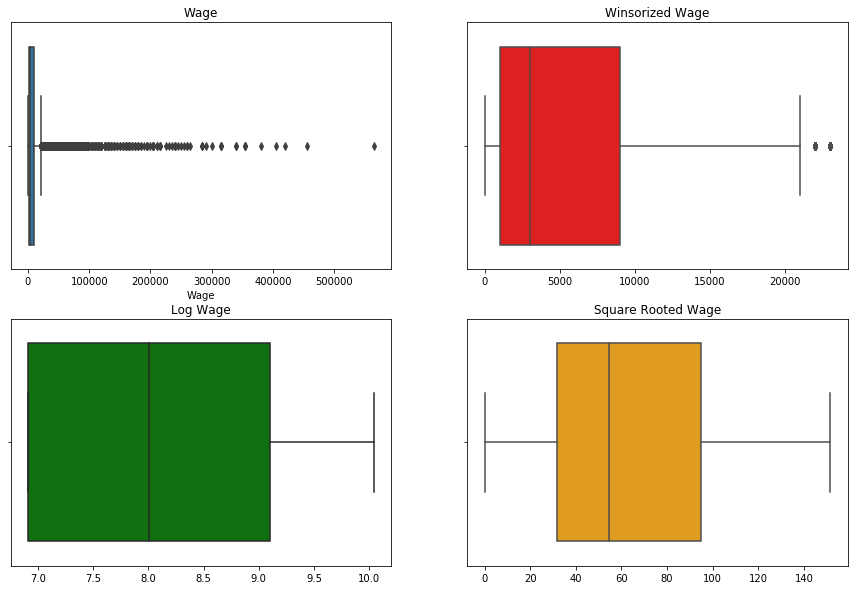

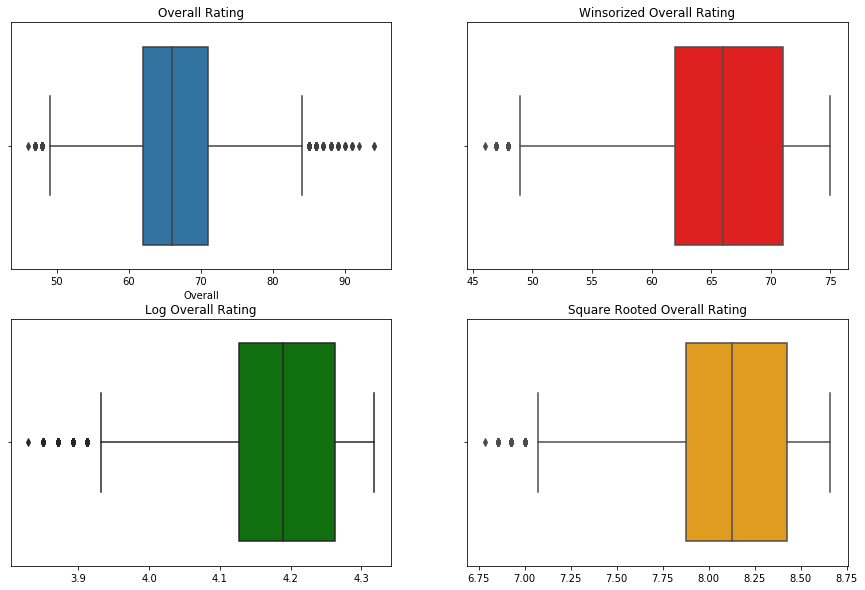

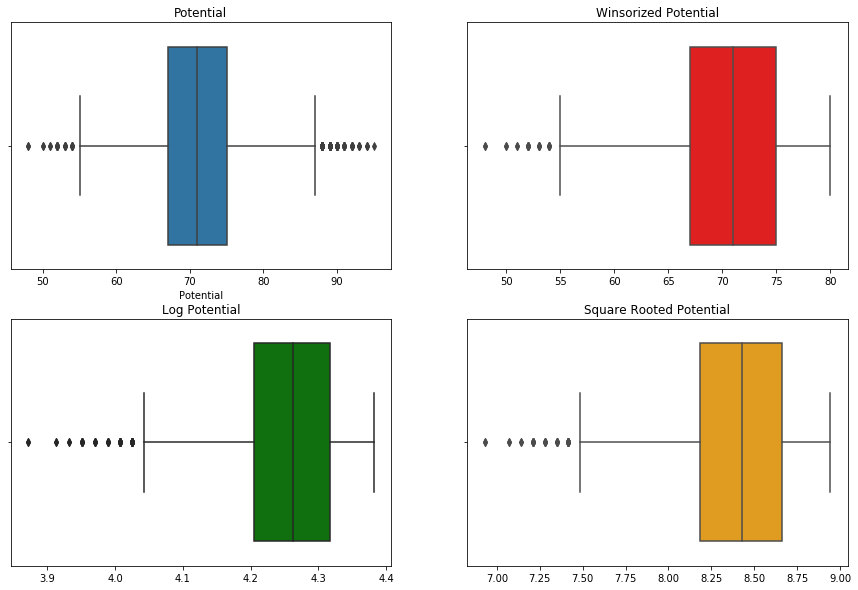

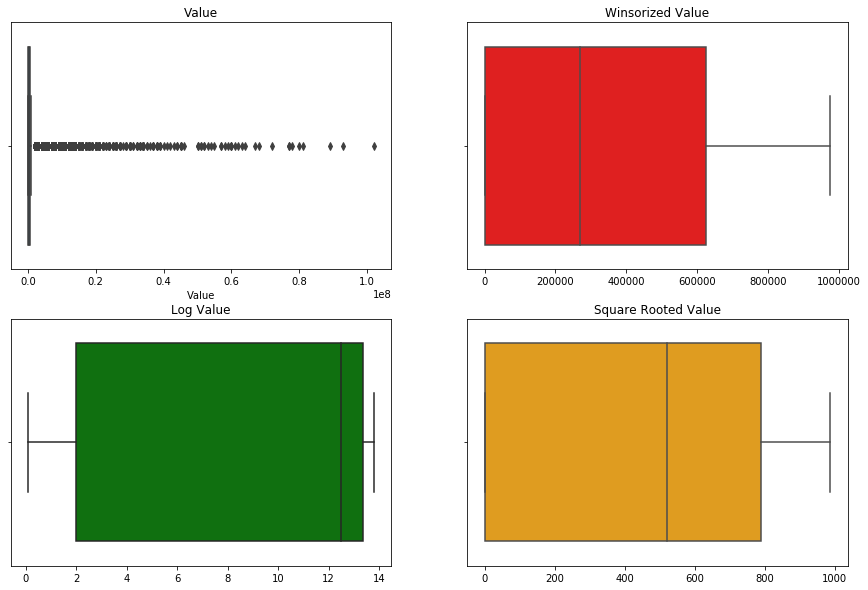

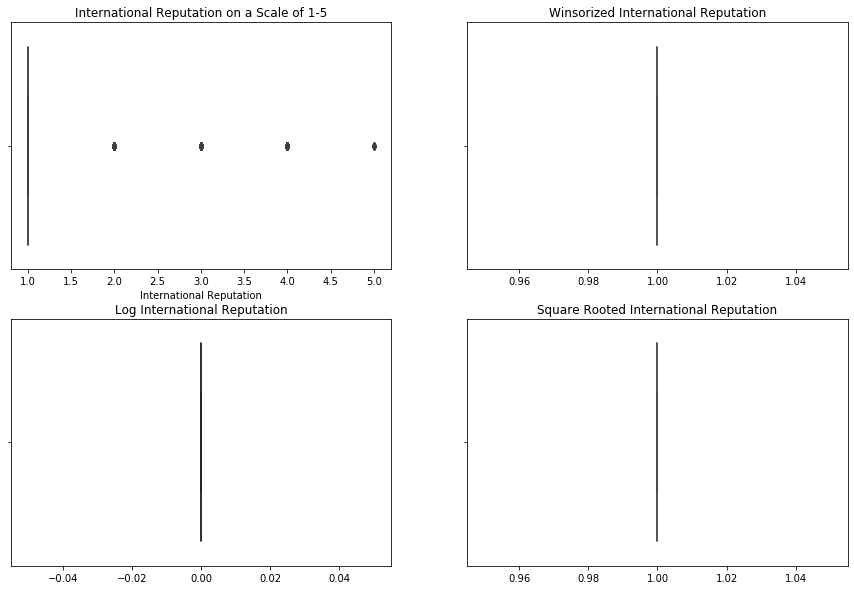

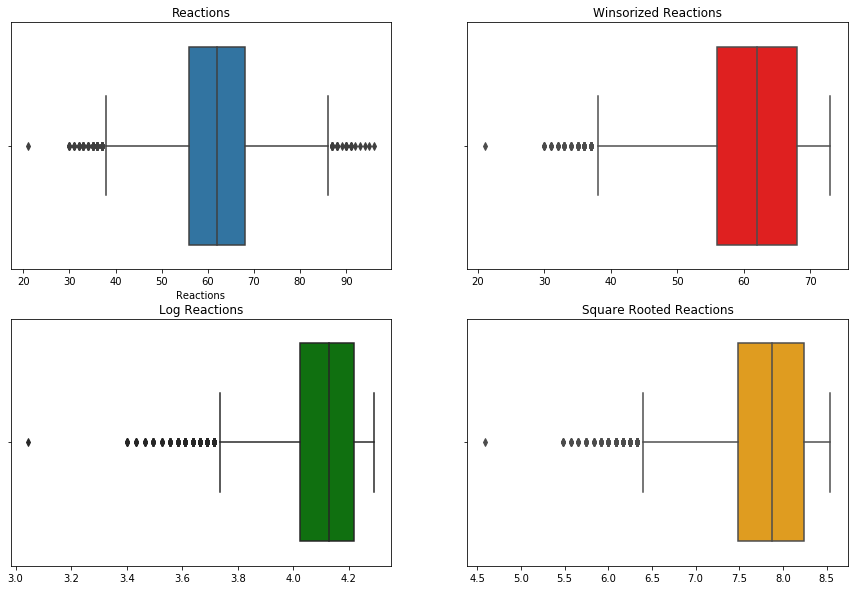

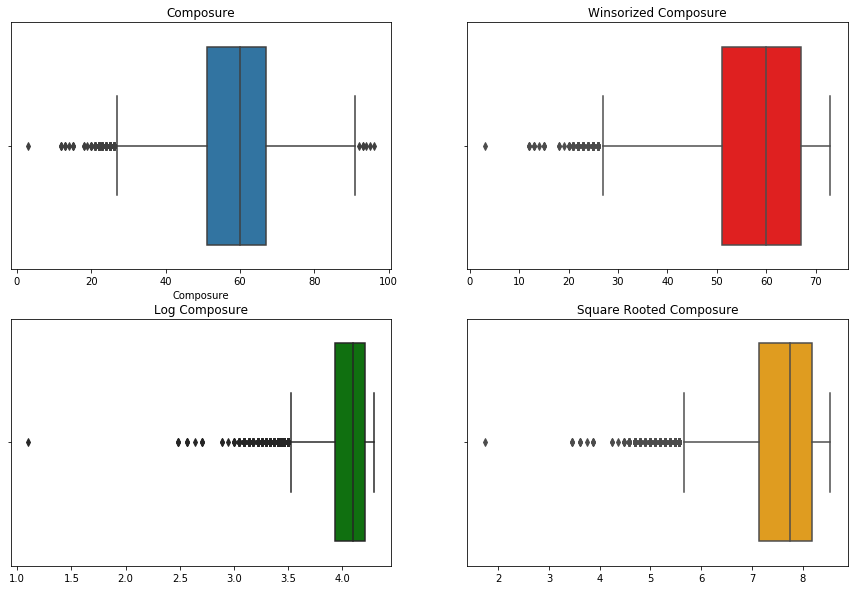

In [37]:
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings(action="ignore")

# Visualizing the distribution of our features
plt.figure(figsize = (15,10))
plt.subplot(2, 2, 1)
sns.boxplot(x='Wage', data=fifa)
plt.title('Wage')
plt.subplot(2, 2, 2)
sns.boxplot(winsorize(fifa["winsorized_Wage"], [0,.10]), color='red')
plt.title('Winsorized Wage')
plt.subplot(2, 2, 3)
sns.boxplot(winsorize(fifa["log_Wage"], [0,.10]), color='green')
plt.title('Log Wage')
plt.subplot(2, 2, 4)
sns.boxplot(winsorize(fifa["sqrt_Wage"], [0,.10]), color='orange')
plt.title('Square Rooted Wage')
plt.show()

plt.figure(figsize = (15,10))
plt.subplot(2, 2, 1)
sns.boxplot(x='Overall', data=fifa)
plt.title('Overall Rating')
plt.subplot(2, 2, 2)
sns.boxplot(winsorize(fifa["winsorized_Overall"], [0,.10]), color='red')
plt.title('Winsorized Overall Rating')
plt.subplot(2, 2, 3)
sns.boxplot(winsorize(fifa["log_Overall"], [0,.10]), color='green')
plt.title('Log Overall Rating')
plt.subplot(2, 2, 4)
sns.boxplot(winsorize(fifa["sqrt_Overall"], [0,.10]), color='orange')
plt.title('Square Rooted Overall Rating')
plt.show()

plt.figure(figsize = (15,10))
plt.subplot(2, 2, 1)
sns.boxplot(fifa['Potential'])
plt.title('Potential')
plt.subplot(2, 2, 2)
sns.boxplot(winsorize(fifa["winsorized_Potential"], [0,.10]), color='red')
plt.title('Winsorized Potential')
plt.subplot(2, 2, 3)
sns.boxplot(winsorize(fifa["log_Potential"], [0,.10]), color='green')
plt.title('Log Potential')
plt.subplot(2, 2, 4)
sns.boxplot(winsorize(fifa["sqrt_Potential"], [0,.10]), color='orange')
plt.title('Square Rooted Potential')
plt.show()

plt.figure(figsize = (15,10))
plt.subplot(2, 2, 1)
sns.boxplot(fifa['Value'])
plt.title('Value')
plt.subplot(2, 2, 2)
sns.boxplot(winsorize(fifa["winsorized_Value"], [0,.10]), color='red')
plt.title('Winsorized Value')
plt.subplot(2, 2, 3)
sns.boxplot(winsorize(fifa["log_Value"], [0,.10]), color='green')
plt.title('Log Value')
plt.subplot(2, 2, 4)
sns.boxplot(winsorize(fifa["sqrt_Value"], [0,.10]), color='orange')
plt.title('Square Rooted Value')
plt.show()

plt.figure(figsize = (15,10))
plt.subplot(2, 2, 1)
sns.boxplot(fifa['International Reputation'])
plt.title('International Reputation on a Scale of 1-5')
plt.subplot(2, 2, 2)
sns.boxplot(winsorize(fifa["winsorized_International Reputation"], [0,.10]), color='red')
plt.title('Winsorized International Reputation')
plt.subplot(2, 2, 3)
sns.boxplot(winsorize(fifa["log_International Reputation"], [0,.10]), color='green')
plt.title('Log International Reputation')
plt.subplot(2, 2, 4)
sns.boxplot(winsorize(fifa["sqrt_International Reputation"], [0,.10]), color='orange')
plt.title('Square Rooted International Reputation')
plt.show()

plt.figure(figsize = (15,10))
plt.subplot(2, 2, 1)
sns.boxplot(fifa['Reactions'])
plt.title('Reactions')
plt.subplot(2, 2, 2)
sns.boxplot(winsorize(fifa["winsorized_Reactions"], [0,.10]), color='red')
plt.title('Winsorized Reactions')
plt.subplot(2, 2, 3)
sns.boxplot(winsorize(fifa["log_Reactions"], [0,.10]), color='green')
plt.title('Log Reactions')
plt.subplot(2, 2, 4)
sns.boxplot(winsorize(fifa["sqrt_Reactions"], [0,.10]), color='orange')
plt.title('Square Rooted Reactions')
plt.show()

plt.figure(figsize = (15,10))
plt.subplot(2, 2, 1)
sns.boxplot(fifa['Composure'])
plt.title('Composure')
plt.subplot(2, 2, 2)
sns.boxplot(winsorize(fifa["winsorized_Composure"], [0,.10]), color='red')
plt.title('Winsorized Composure')
plt.subplot(2, 2, 3)
sns.boxplot(winsorize(fifa["log_Composure"], [0,.10]), color='green')
plt.title('Log Composure')
plt.subplot(2, 2, 4)
sns.boxplot(winsorize(fifa["sqrt_Composure"], [0,.10]), color='orange')
plt.title('Square Rooted Composure')
plt.show()

In [38]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
fifa.corr()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,winsorized_Wage,log_Wage,sqrt_Wage,norm_sqrt_Wage,winsorized_Overall,log_Overall,sqrt_Overall,norm_winsorized_Overall,winsorized_Potential,log_Potential,sqrt_Potential,norm_sqrt_Potential,winsorized_Value,log_Value,sqrt_Value,norm_sqrt_Value,winsorized_International Reputation,log_International Reputation,sqrt_International Reputation,norm_International Reputation,winsorized_Reactions,log_Reactions,sqrt_Reactions,norm_winsorized_Reactions,winsorized_Composure,log_Composure,sqrt_Composure,norm_winsorized_Composure,norm_sqrt_International Reputation
Age,1.000000,0.453354,-0.252259,0.048426,0.141519,0.237009,0.253985,0.059964,0.027814,0.082844,0.230256,0.130663,0.068789,0.147204,0.133117,0.142766,0.010373,0.143432,0.193495,0.181710,0.085090,-0.158621,-0.151523,-0.019542,0.453174,-0.089991,0.156965,0.177371,0.097859,0.333331,0.155191,0.265250,0.197841,0.082742,0.187610,0.139435,0.391083,0.142822,0.119645,0.103036,0.101212,0.106456,0.104920,0.116324,0.103279,0.233838,0.290297,0.218020,0.218020,0.472187,0.464271,0.459199,0.472187,-0.256696,-0.252757,-0.252649,-0.252649,0.019013,-0.079444,0.035626,0.035626,NaN,0.266339,0.261453,NaN,0.463771,0.456136,0.455621,0.463771,0.388272,0.366918,0.382040,0.388272,NaN
Overall,0.453354,1.000000,0.660947,0.394721,0.571795,0.607108,0.499596,0.212464,0.414363,0.038480,0.154463,0.394849,0.332674,0.340602,0.502275,0.391445,0.372358,0.419501,0.397004,0.483639,0.460034,0.197178,0.210971,0.265253,0.850071,0.103245,0.441080,0.264409,0.365652,0.349318,0.420791,0.395142,0.321174,0.356497,0.498683,0.341639,0.727646,0.286364,0.252395,0.222496,-0.025988,-0.025150,-0.029394,-0.017677,-0.023280,0.746451,0.806357,0.737964,0.737964,0.979606,0.997159,0.999290,0.979606,0.638841,0.658527,0.659998,0.659998,0.147316,-0.350801,0.317930,0.317930,NaN,0.506100,0.504750,NaN,0.823821,0.833411,0.843255,0.823821,0.705386,0.676887,0.707429,0.705386,NaN
Potential,-0.252259,0.660947,1.000000,0.364371,0.486608,0.384359,0.373024,0.162818,0.354107,-0.010120,-0.007297,0.246188,0.243436,0.200665,0.368765,0.254879,0.314867,0.279886,0.230620,0.320960,0.354149,0.235020,0.237097,0.222774,0.513415,0.138334,0.288124,0.108986,0.202497,0.075144,0.266617,0.170622,0.154665,0.245445,0.347761,0.224465,0.439959,0.162564,0.143325,0.128621,-0.053422,-0.054736,-0.059027,-0.052518,-0.053290,0.585802,0.600091,0.593169,0.593169,0.619058,0.645400,0.653599,0.619058,0.983249,0.998177,0.999547,0.999547,0.102604,-0.304131,0.284051,0.284051,NaN,0.370626,0.372958,NaN,0.472859,0.488582,0.501811,0.472859,0.413135,0.401388,0.423444,0.413135,NaN
Value,0.048426,0.394721,0.364371,1.000000,0.603241,0.228294,0.479562,0.100872,0.185718,0.009172,0.032525,0.143930,0.156315,0.110328,0.195818,0.175683,0.159475,0.167862,0.157162,0.178225,0.182341,0.100350,0.102279,0.114976,0.339648,0.066523,0.166674,0.094474,0.125038,0.085557,0.163213,0.114111,0.081471,0.155123,0.218359,0.146102,0.275733,0.076759,0.059427,0.047468,-0.007352,-0.009352,-0.011881,-0.007622,-0.006916,0.364113,0.378901,0.524211,0.524211,0.279250,0.362692,0.378616,0.279250,0.279263,0.343452,0.353903,0.353903,0.417996,0.298233,0.877649,0.877649,NaN,0.443986,0.461619,NaN,0.250734,0.302251,0.321051,0.250734,0.222942,0.232931,0.255434,0.222942,NaN
Wage,0.141519,0.571795,0.486608,0.603241,1.000000,0.347830,0.668612,0.140993,0.263163,0.019526,0.064692,0.232828,0.217522,0.187954,0.296615,0.257357,0.237123,0.259511,0.236388,0.276646,0.277598,0.125050,0.130373,0.156387,0.495598,0.088981,0.258357,0.129657,0.177569,0.139231,0.249074,0.194494,0.157377,0.226763,0.315311,0.

In [17]:
# Testing Normality

jb_stats = stats.jarque_bera(fifa["norm_sqrt_Wage"])
norm_stats = stats.normaltest(fifa["norm_sqrt_Wage"])

print("Jarque-Bera test statistics for normalized Wage is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for normalized Wage is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = stats.jarque_bera(fifa["norm_winsorized_Overall"])
norm_stats = stats.normaltest(fifa["norm_winsorized_Overall"])

print("Jarque-Bera test statistics for normalized Overall is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for normalized Overall is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = stats.jarque_bera(fifa["norm_sqrt_Potential"])
norm_stats = stats.normaltest(fifa["norm_sqrt_Potential"])

print("Jarque-Bera test statistics for normalized Potential is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for normalized Potential is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = stats.jarque_bera(fifa["norm_sqrt_Value"])
norm_stats = stats.normaltest(fifa["norm_sqrt_Value"])

print("Jarque-Bera test statistics for normalized Value is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for normalized Value is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = stats.jarque_bera(fifa["norm_International Reputation"])
norm_stats = stats.normaltest(fifa["norm_International Reputation"])

print("Jarque-Bera test statistics for normalized International Reputation is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for normalized International Reputation is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = stats.jarque_bera(fifa["norm_winsorized_Reactions"])
norm_stats = stats.normaltest(fifa["norm_winsorized_Reactions"])

print("Jarque-Bera test statistics for normalized Reactions is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for normalized Reactions is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = stats.jarque_bera(fifa["norm_winsorized_Composure"])
norm_stats = stats.normaltest(fifa["norm_winsorized_Composure"])

print("Jarque-Bera test statistics for normalized Composure is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for normalized Composure is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics for normalized Wage is 117651.43891220851 and p value is 0.0
Normality test statistics for normalized Wage is 10676.064794092112 and p value is 0.0
Jarque-Bera test statistics for normalized Overall is 631.6500690451717 and p value is 0.0
Normality test statistics for normalized Overall is 678.3109157525527 and p value is 5.089277557739521e-148
Jarque-Bera test statistics for normalized Potential is 58.26642718032251 and p value is 2.2259971643734389e-13
Normality test statistics for normalized Potential is 57.759934366187885 and p value is 2.868069128498882e-13
Jarque-Bera test statistics for normalized Value is 275738.6042294287 and p value is 0.0
Normality test statistics for normalized Value is 13661.583420641196 and p value is 0.0
Jarque-Bera test statistics for normalized International Reputation is nan and p value is nan
Normality test statistics for normalized International Reputation is 45209.823496272766 and p value is 0.0
Jarque-Bera test statisti

In [39]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfg = ensemble.RandomForestRegressor()
Y = fifa['norm_sqrt_Wage']
X = fifa[["norm_sqrt_Potential", "norm_sqrt_Value",  "norm_winsorized_Overall", "norm_winsorized_Reactions", "norm_winsorized_Composure"]]#, "norm_sqrt_Potential", "norm_sqrt_Value", "norm_International Reputation", "norm_winsorized_Overall", "norm_winsorized_Reactions", "norm_winsorized_Composure"]]
# X = pd.get_dummies(X)
# X = X.dropna(axis=1)


cross_val_score(rfg, X, Y, cv=10)

array([-0.43346725, -0.11403608, -0.1844511 ,  0.03935384, -0.18769592,
       -0.01419887, -0.03700613, -0.12360418, -0.0930706 , -0.19096586])